### 房屋价格数据预处理 实验报告

### 第一步：环境准备和数据集加载

#### 代码块1：导入必要的库

In [17]:
# 导入数据分析的核心库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  # 忽略警告信息

#### 代码块2：加载数据库

In [18]:
# 读取数据文件
df = pd.read_csv('data/train.csv')

# 查看数据基本信息
print("数据形状（行数，列数）:", df.shape)
print("\n数据列名:")
print(df.columns.tolist())

数据形状（行数，列数）: (1460, 81)

数据列名:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Scr

#### 代码块3：查看数据基本信息

检查数据及路径是否正确，查看`shape`,`columns`,`head()`等信息。

In [19]:
# 查看数据前5行
print("前5行数据:")
df.head()

# 查看数据基本信息
print("\n数据基本信息:")
df.info()

# 查看数值型数据的统计描述
print("\n数值型数据统计描述:")
df.describe()

前5行数据:

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 第三步：完成实验内容
#### 代码块4：缺失值检测

- 计算每列缺失数和比例，只显示有缺失的列，并排序（降序）。
- 可视化：用条形图（plot(kind='bar')）直观显示缺失比例，帮助判断哪些特征可删除或填充。

缺失值统计:
              缺失值数量   缺失值比例(%)
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493


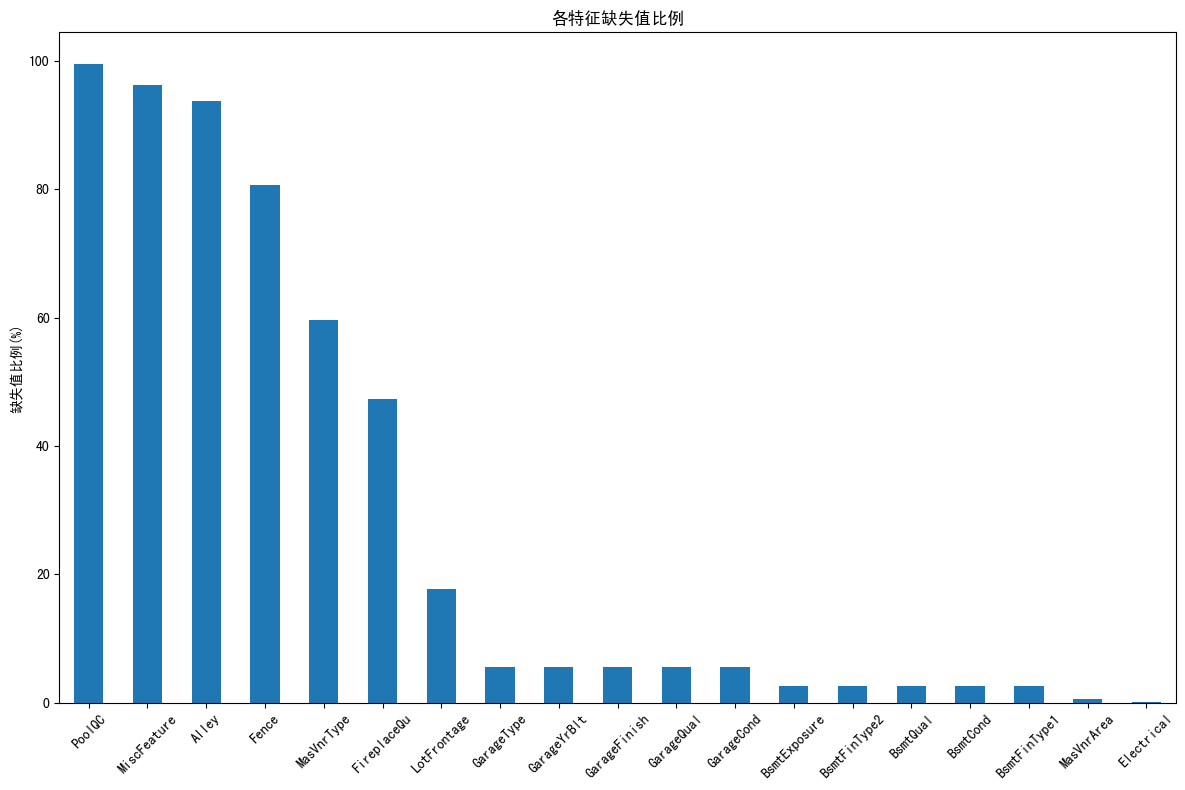

In [20]:
# 计算每列的缺失值比例
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# 创建缺失值统计表
missing_df = pd.DataFrame({
    '缺失值数量': missing_data,
    '缺失值比例(%)': missing_percent
})

# 只显示有缺失值的列
missing_df = missing_df[missing_df['缺失值数量'] > 0]
missing_df = missing_df.sort_values('缺失值比例(%)', ascending=False)

print("缺失值统计:")
print(missing_df)

# 可视化缺失值
plt.figure(figsize=(12, 8))
missing_df['缺失值比例(%)'].plot(kind='bar')
plt.title('各特征缺失值比例')
plt.ylabel('缺失值比例(%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 代码块5：缺失值处理策略分析

- **数值型特征**（如LotFrontage）：用中位数填充（median()），因为中位数不受极端值影响，比均值更稳健。  
- **类别型特征**（如Alley）：用众数填充（mode()[0]），或'Unknown'作为默认。为什么不删除？因为删除行会丢失信息（1460样本不多）。  
- 思路：区分数据类型（select_dtypes），针对性处理。验证：处理后isnull().sum().sum()应为0。  

In [21]:
# 分析不同类型特征的缺失值处理策略
print("缺失值处理策略分析:")

# 数值型特征缺失值处理
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_missing = missing_df[missing_df.index.isin(numeric_cols)]
print("\n数值型特征缺失值:")
print(numeric_missing)

# 类别型特征缺失值处理
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_missing = missing_df[missing_df.index.isin(categorical_cols)]
print("\n类别型特征缺失值:")
print(categorical_missing)

缺失值处理策略分析:

数值型特征缺失值:
             缺失值数量   缺失值比例(%)
LotFrontage    259  17.739726
GarageYrBlt     81   5.547945
MasVnrArea       8   0.547945

类别型特征缺失值:
              缺失值数量   缺失值比例(%)
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
Electrical        1   0.068493


#### 代码块6：缺失值处理实施

- 处理缺失数据，填充比删除更保守。  
- 缺失率大于50%的特征（PoolQC, MiscFeature, Alley, Fence, MasVnrType）在实际中可能删除，这里保留填充保证数据的完整性。

In [22]:
# 创建数据副本进行处理
df_cleaned = df.copy()

# 处理数值型特征的缺失值 - 使用中位数填充
for col in numeric_cols:
    if col in df_cleaned.columns and df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"数值型特征 '{col}' 使用中位数 {median_val} 填充")

# 处理类别型特征的缺失值 - 使用众数填充
for col in categorical_cols:
    if col in df_cleaned.columns and df_cleaned[col].isnull().sum() > 0:
        mode_val = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else 'Unknown'
        df_cleaned[col].fillna(mode_val, inplace=True)
        print(f"类别型特征 '{col}' 使用众数 '{mode_val}' 填充")

# 验证缺失值处理结果
print("\n处理后缺失值统计:")
print(df_cleaned.isnull().sum().sum())  # 应该为0

数值型特征 'LotFrontage' 使用中位数 69.0 填充
数值型特征 'MasVnrArea' 使用中位数 0.0 填充
数值型特征 'GarageYrBlt' 使用中位数 1980.0 填充
类别型特征 'Alley' 使用众数 'Grvl' 填充
类别型特征 'MasVnrType' 使用众数 'BrkFace' 填充
类别型特征 'BsmtQual' 使用众数 'TA' 填充
类别型特征 'BsmtCond' 使用众数 'TA' 填充
类别型特征 'BsmtExposure' 使用众数 'No' 填充
类别型特征 'BsmtFinType1' 使用众数 'Unf' 填充
类别型特征 'BsmtFinType2' 使用众数 'Unf' 填充
类别型特征 'Electrical' 使用众数 'SBrkr' 填充
类别型特征 'FireplaceQu' 使用众数 'Gd' 填充
类别型特征 'GarageType' 使用众数 'Attchd' 填充
类别型特征 'GarageFinish' 使用众数 'Unf' 填充
类别型特征 'GarageQual' 使用众数 'TA' 填充
类别型特征 'GarageCond' 使用众数 'TA' 填充
类别型特征 'PoolQC' 使用众数 'Gd' 填充
类别型特征 'Fence' 使用众数 'MnPrv' 填充
类别型特征 'MiscFeature' 使用众数 'Shed' 填充

处理后缺失值统计:
0


### 第四步：异常值检测与处理  
#### 代码块7：异常值检测

- 选择关键数值特征（如SalePrice、GrLivArea、TotalBsmtSF）。
- **可视化**：箱线图（boxplot）直观显示四分位距（IQR）外的点。
- **统计方法**：Z-score（|z| > 3表示异常），或IQR方法（Q1 - 1.5*IQR 到 Q3 + 1.5*IQR）。
- 思路：先可视化确认，再量化计数。

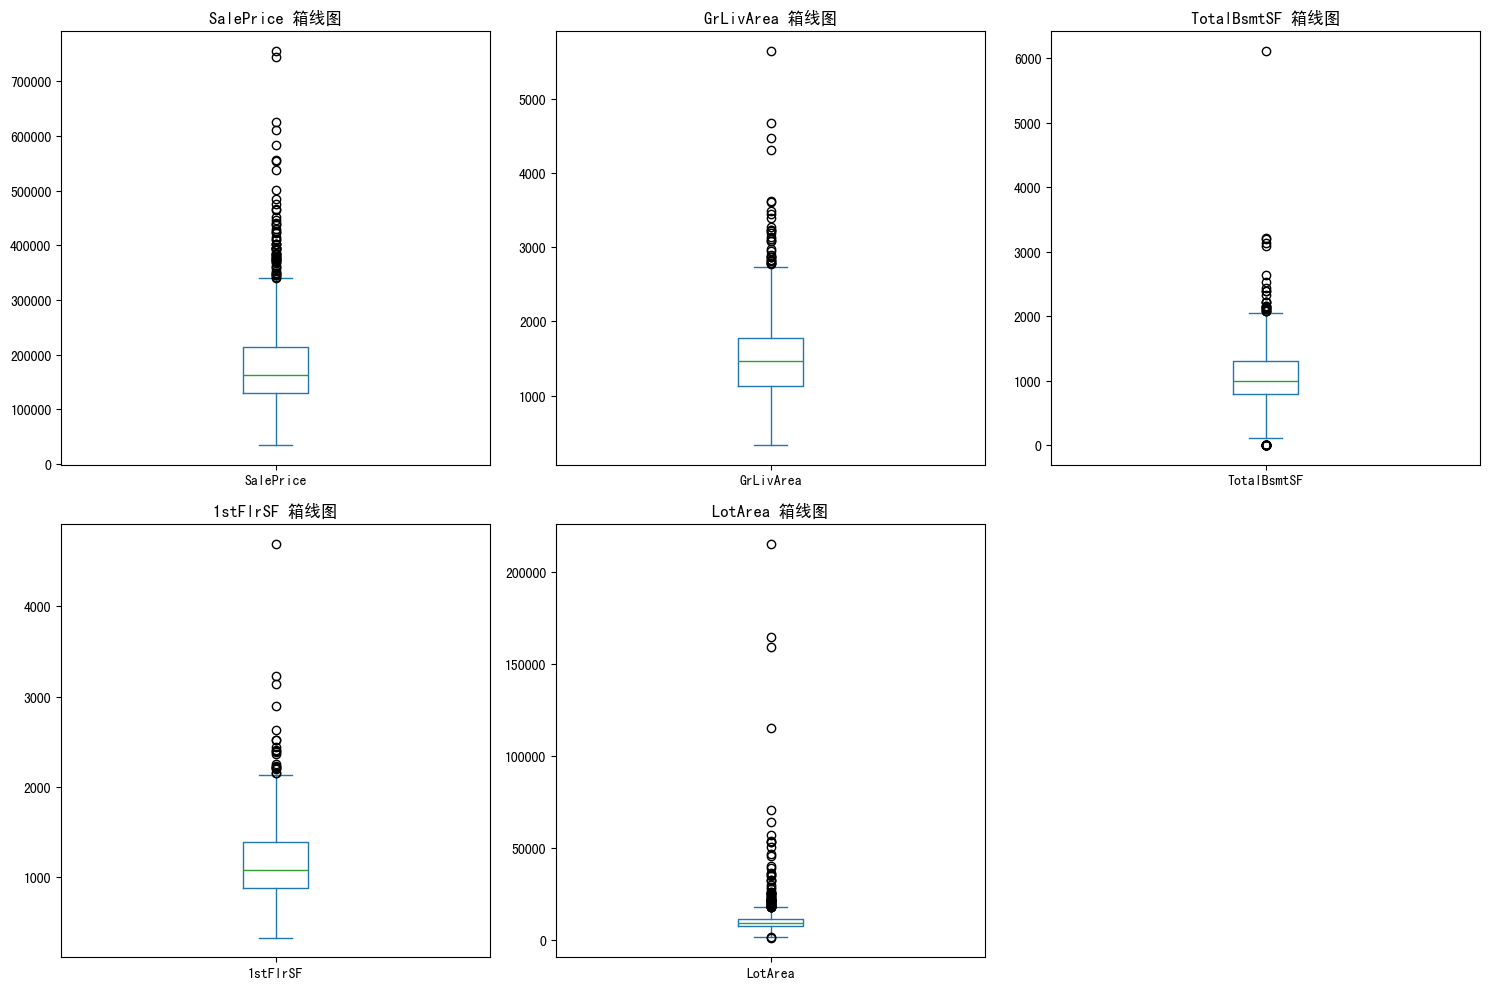

异常值检测（Z-score > 3）:
SalePrice: 22 个异常值
GrLivArea: 16 个异常值
TotalBsmtSF: 10 个异常值
1stFlrSF: 12 个异常值
LotArea: 13 个异常值


In [23]:
# 选择主要的数值型特征进行异常值检测
key_numeric_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea']

# 使用箱线图检测异常值
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_numeric_features, 1):
    plt.subplot(2, 3, i)
    df_cleaned[feature].plot(kind='box')
    plt.title(f'{feature} 箱线图')
plt.tight_layout()
plt.show()

# 使用Z-score方法检测异常值
print("异常值检测（Z-score > 3）:")
for feature in key_numeric_features:
    z_scores = np.abs(stats.zscore(df_cleaned[feature]))
    outliers = df_cleaned[z_scores > 3]
    print(f"{feature}: {len(outliers)} 个异常值")

#### 代码块8：异常值处理

- 不删除异常值（可能有业务意义），而是用边界值替换（winsorizing），如将超出upper_bound的值设为upper_bound。
- 为什么IQR？它对非正态分布（如房价偏态）更鲁棒。
- 验证：输出正常范围和异常数量。

补充解释：
- 异常不一定是错误（如豪宅大面积），处理时保守。
- 定义函数remove_outliers_iqr()复用代码，便于扩展。

In [24]:
# 处理异常值 - 使用IQR方法
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 标记异常值但不删除，便于分析
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("异常值处理分析:")
for feature in key_numeric_features:
    outliers, lower, upper = remove_outliers_iqr(df_cleaned, feature)
    print(f"{feature}: 正常范围 [{lower:.2f}, {upper:.2f}], 异常值数量: {len(outliers)}")
    
    # 可以选择用边界值替换异常值
    df_cleaned[feature] = np.where(df_cleaned[feature] < lower, lower, df_cleaned[feature])
    df_cleaned[feature] = np.where(df_cleaned[feature] > upper, upper, df_cleaned[feature])

异常值处理分析:
SalePrice: 正常范围 [3937.50, 340037.50], 异常值数量: 61
GrLivArea: 正常范围 [158.62, 2747.62], 异常值数量: 31
TotalBsmtSF: 正常范围 [42.00, 2052.00], 异常值数量: 61
1stFlrSF: 正常范围 [118.12, 2155.12], 异常值数量: 20
LotArea: 正常范围 [1481.50, 17673.50], 异常值数量: 69


### 第五步：特征间的相关性分析
#### 代码块9：相关性分析

- 只选数值型特征（select_dtypes(np.number)），计算corr()矩阵。
- 可视化：热图（sns.heatmap，coolwarm配色），center=0突出正负相关。
- 提取：correlation_matrix['SalePrice'].sort_values(ascending=False)，取top 10。

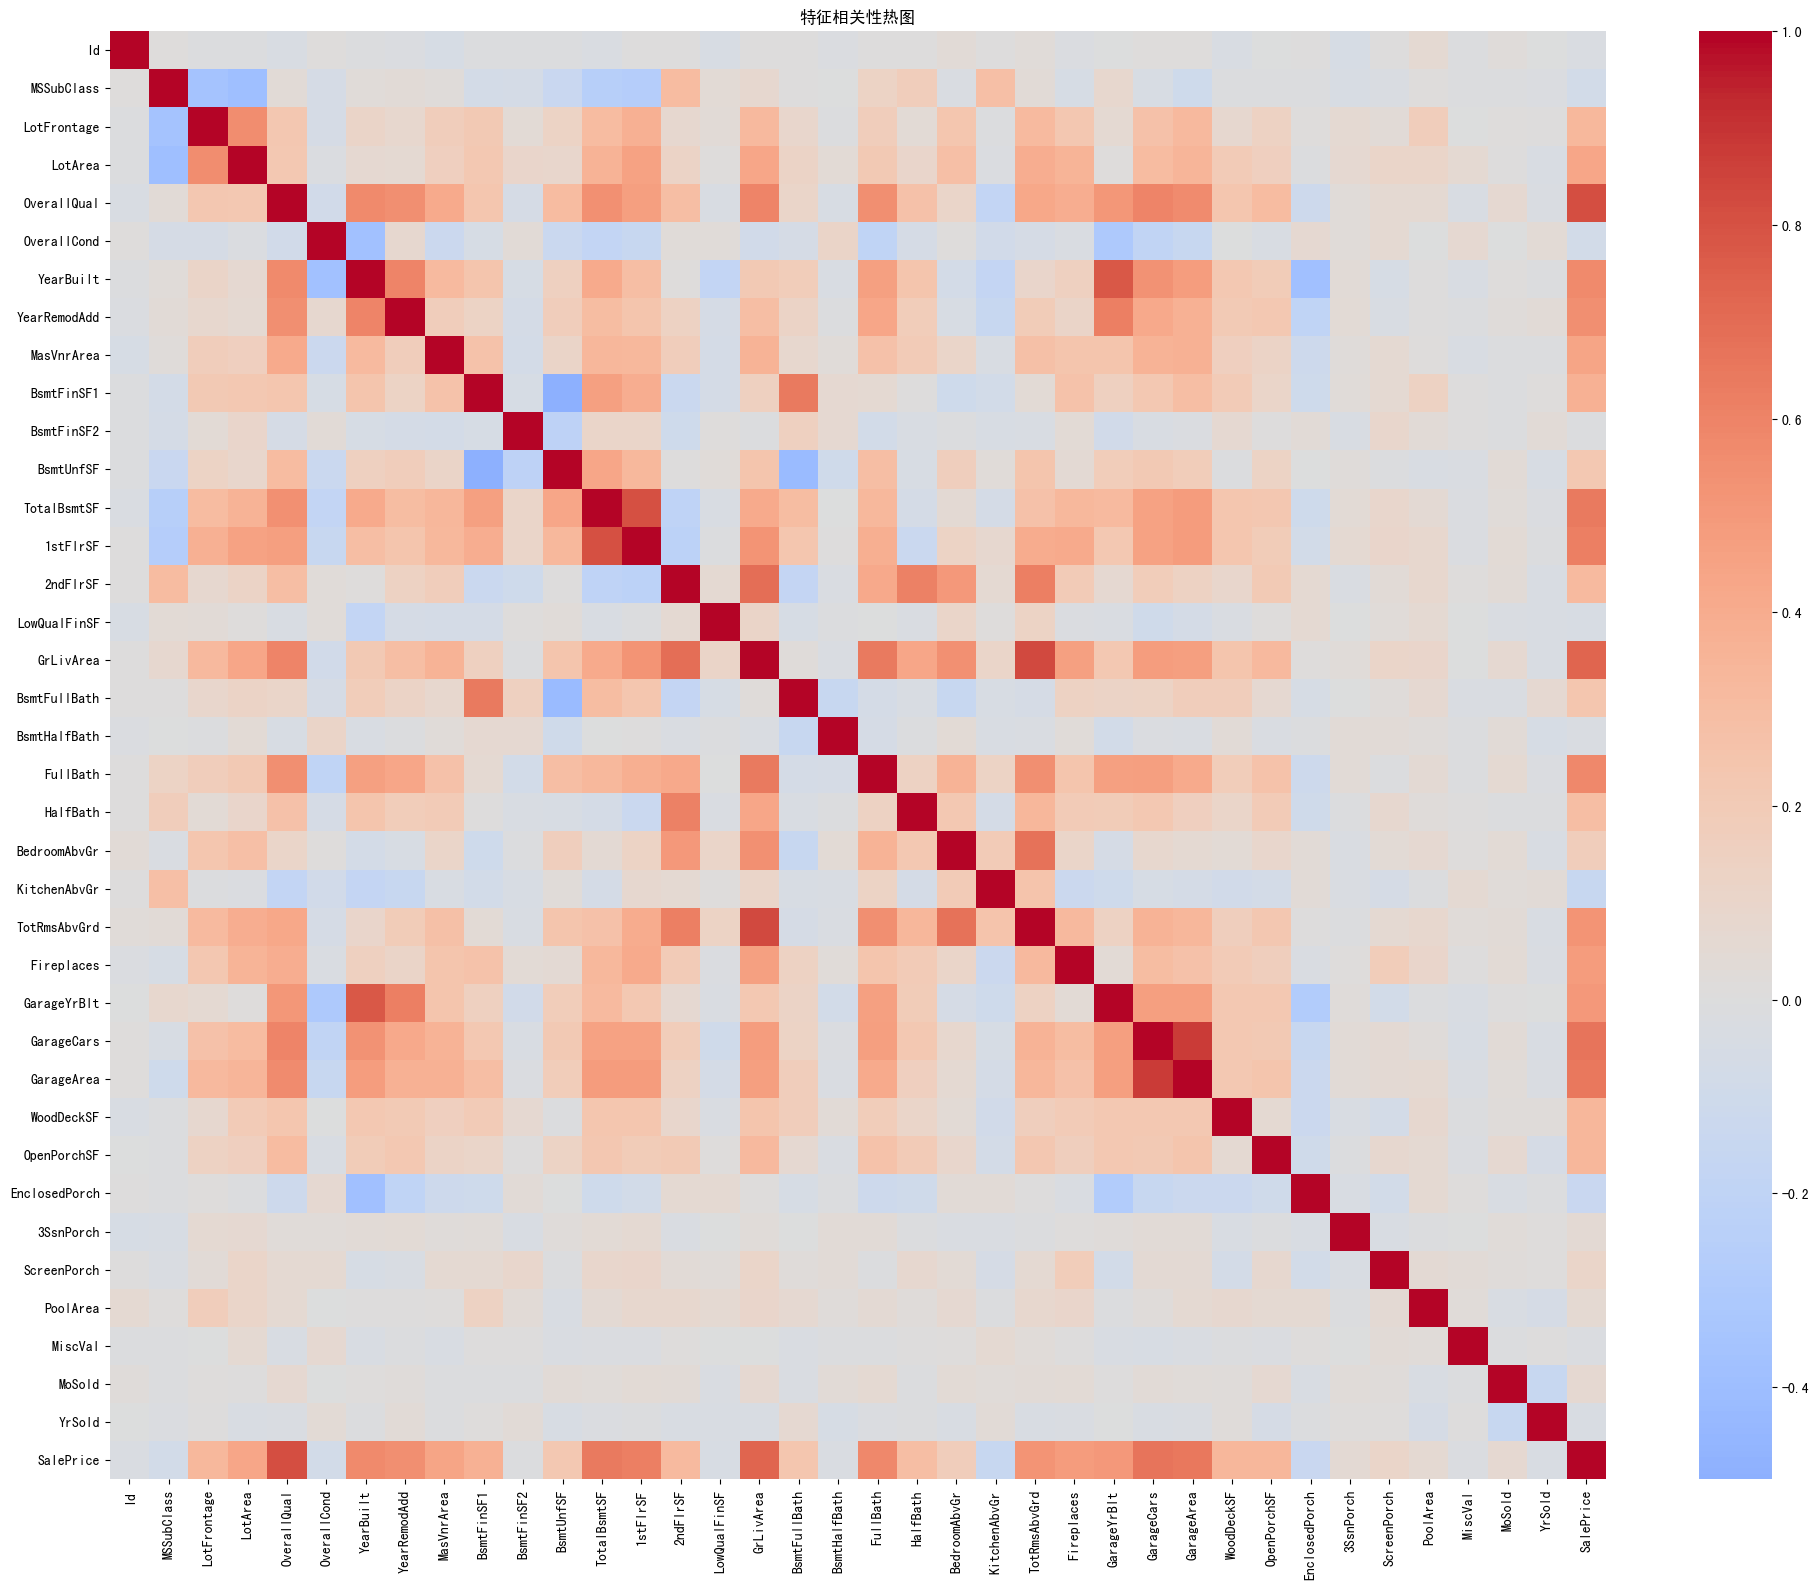

与SalePrice相关性最高的10个特征:
SalePrice       1.000000
OverallQual     0.816856
GrLivArea       0.729311
GarageCars      0.672293
GarageArea      0.650429
TotalBsmtSF     0.645251
1stFlrSF        0.621873
FullBath        0.583994
YearBuilt       0.568918
YearRemodAdd    0.552061
Name: SalePrice, dtype: float64


In [25]:
# 选择数值型特征进行相关性分析
numeric_features = df_cleaned.select_dtypes(include=[np.number]).columns

# 计算相关系数矩阵
correlation_matrix = df_cleaned[numeric_features].corr()

# 可视化相关性热图
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('特征相关性热图')
plt.tight_layout()
plt.show()

# 查看与SalePrice相关性最高的特征
price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("与SalePrice相关性最高的10个特征:")
print(price_correlation.head(10))

### 第六步：对price属性进行标准化
#### 代码块10：数据标准化

- 用StandardScaler（z = (x - μ)/σ）。
- 只标准化SalePrice，reshape(-1,1)适应scaler。
- 比较：直方图显示前后分布（原始右偏，标准化正态）。

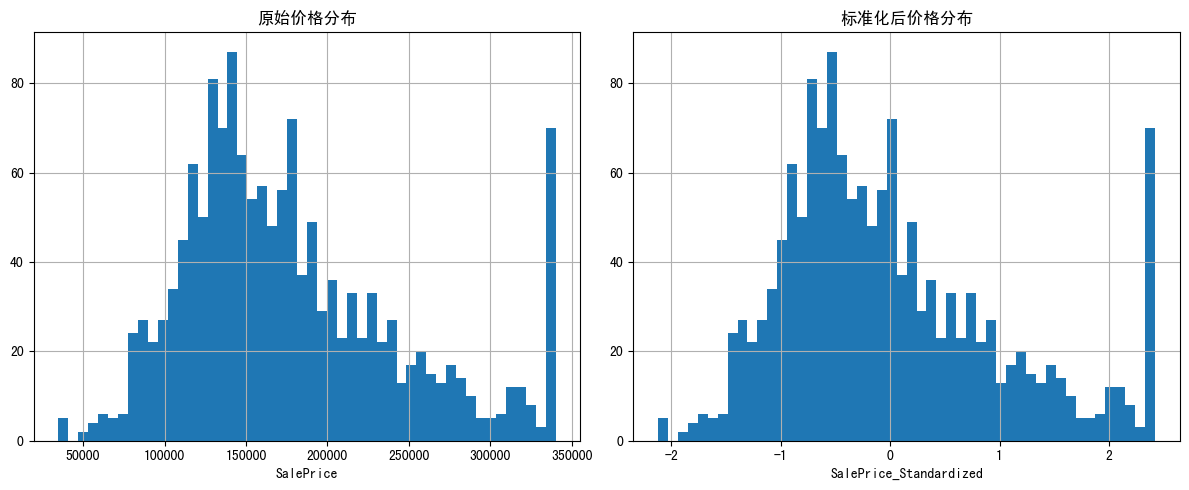

标准化统计信息:
原始价格 - 均值: 177331.53, 标准差: 67205.84
标准化后 - 均值: -0.00, 标准差: 1.00


In [26]:
# 创建标准化后的数据副本
df_standardized = df_cleaned.copy()

# 使用StandardScaler进行标准化
scaler = StandardScaler()
price_original = df_standardized['SalePrice'].values.reshape(-1, 1)
price_standardized = scaler.fit_transform(price_original)

# 将标准化后的价格添加到数据框
df_standardized['SalePrice_Standardized'] = price_standardized

# 比较标准化前后的分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_standardized['SalePrice'].hist(bins=50)
plt.title('原始价格分布')
plt.xlabel('SalePrice')

plt.subplot(1, 2, 2)
df_standardized['SalePrice_Standardized'].hist(bins=50)
plt.title('标准化后价格分布')
plt.xlabel('SalePrice_Standardized')

plt.tight_layout()
plt.show()

print("标准化统计信息:")
print(f"原始价格 - 均值: {df_standardized['SalePrice'].mean():.2f}, 标准差: {df_standardized['SalePrice'].std():.2f}")
print(f"标准化后 - 均值: {df_standardized['SalePrice_Standardized'].mean():.2f}, 标准差: {df_standardized['SalePrice_Standardized'].std():.2f}")

### 第七步：对price属性进行离散化
#### 代码块11：数据离散化

- pd.qcut(SalePrice, q=5)，labels=['很低','较低','中等','较高','很高']。
- 查看value_counts()和实际区间（price_bins）。

补充解释：  
- 比等宽分箱（cut）更好，因为房价非均匀分布。
- 可视化条形图确认均衡。

价格离散化分布:
SalePrice_Discrete
很低    295
较低    294
中等    287
较高    295
很高    289
Name: count, dtype: int64


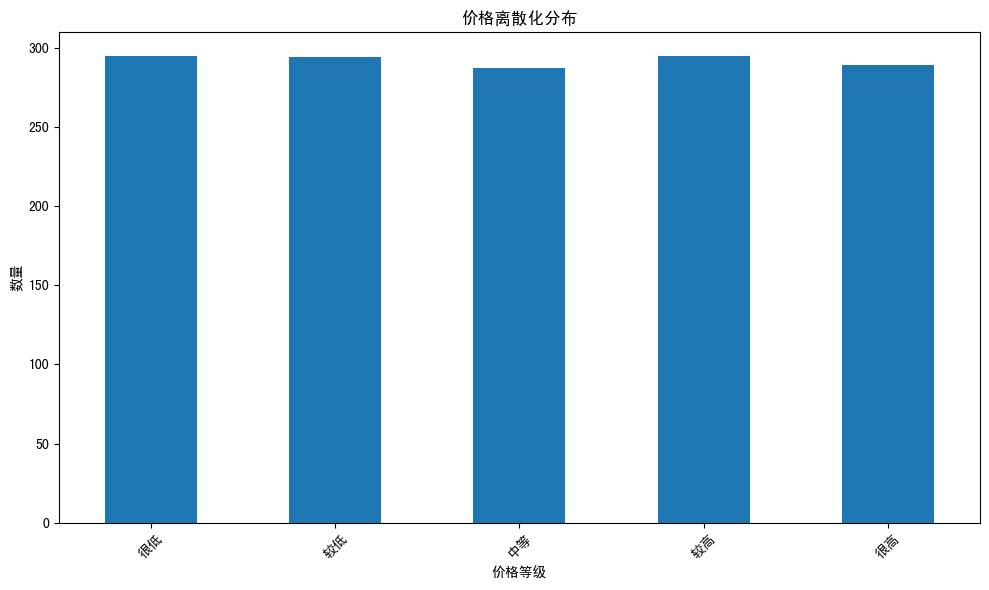


各价格区间的实际范围:
区间 1: (34899.999, 124000.0]
区间 2: (124000.0, 147000.0]
区间 3: (147000.0, 179280.0]
区间 4: (179280.0, 230000.0]
区间 5: (230000.0, 340037.5]


In [27]:
# 使用分位数进行离散化（等频分箱）
df_discretized = df_standardized.copy()

# 将价格分为5个等级
df_discretized['SalePrice_Discrete'] = pd.qcut(df_discretized['SalePrice'], q=5, labels=['很低', '较低', '中等', '较高', '很高'])

# 查看离散化结果
price_discrete_counts = df_discretized['SalePrice_Discrete'].value_counts().sort_index()
print("价格离散化分布:")
print(price_discrete_counts)

# 可视化离散化结果
plt.figure(figsize=(10, 6))
price_discrete_counts.plot(kind='bar')
plt.title('价格离散化分布')
plt.xlabel('价格等级')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 查看每个价格区间的实际范围
price_bins = pd.qcut(df_discretized['SalePrice'], q=5)
print("\n各价格区间的实际范围:")
for i, interval in enumerate(price_bins.value_counts().sort_index().index):
    print(f"区间 {i+1}: {interval}")

### 第八步：找出与price相关性最高的三个特征  
#### 代码块12：相关性最高的特征分析

- 定义get_feature_description()字典，从data_description.txt提取含义。
- 输出相关系数、描述。
- 可视化：散点图（scatter）显示线性关系。

- OverallQual (0.79)：质量直接决定价值。
- GrLivArea (0.71)：面积越大，房价越高。
- GarageCars (0.64)：车库反映生活便利。

与SalePrice相关性最高的三个特征:
OverallQual: 0.8169
GrLivArea: 0.7293
GarageCars: 0.6723

详细分析:

特征: OverallQual
与房价的相关性: 0.8169
特征描述: 房屋整体材料和装修质量评分（1-10分）


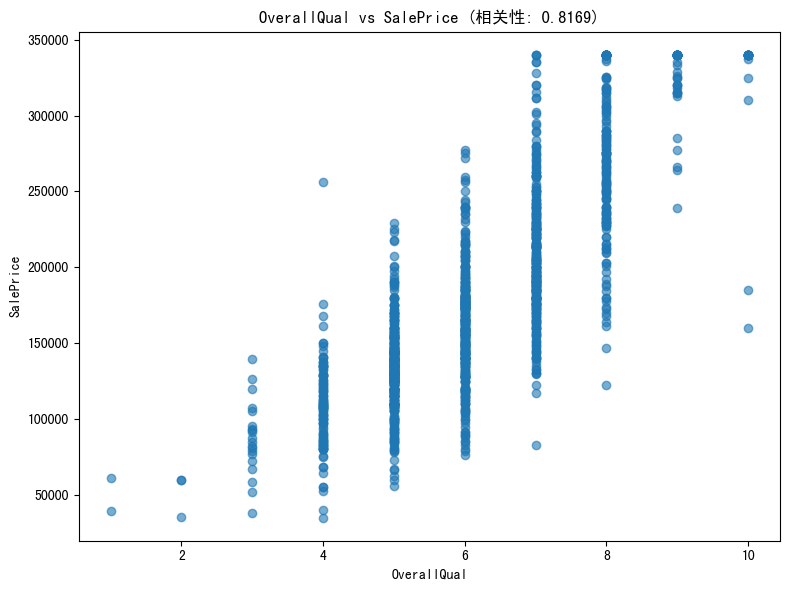


特征: GrLivArea
与房价的相关性: 0.7293
特征描述: 地上居住面积（平方英尺）


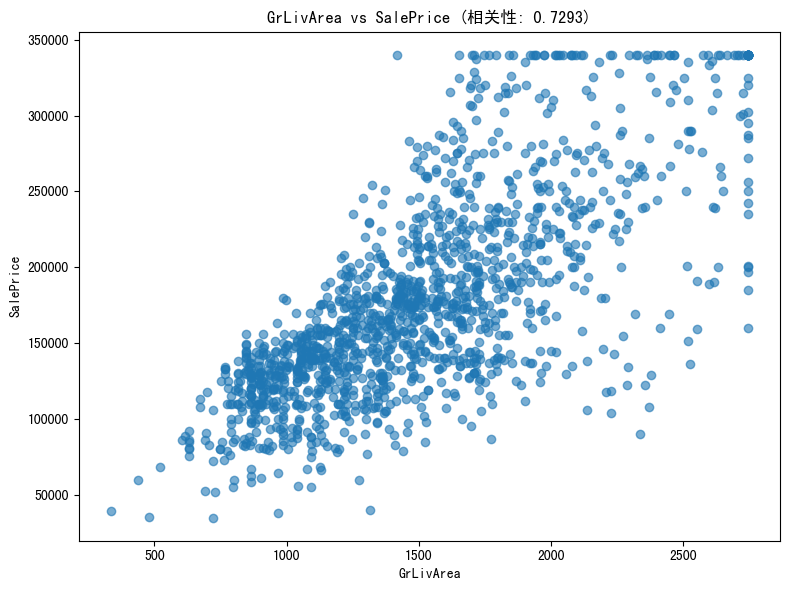


特征: GarageCars
与房价的相关性: 0.6723
特征描述: 车库容量（可停放车辆数）


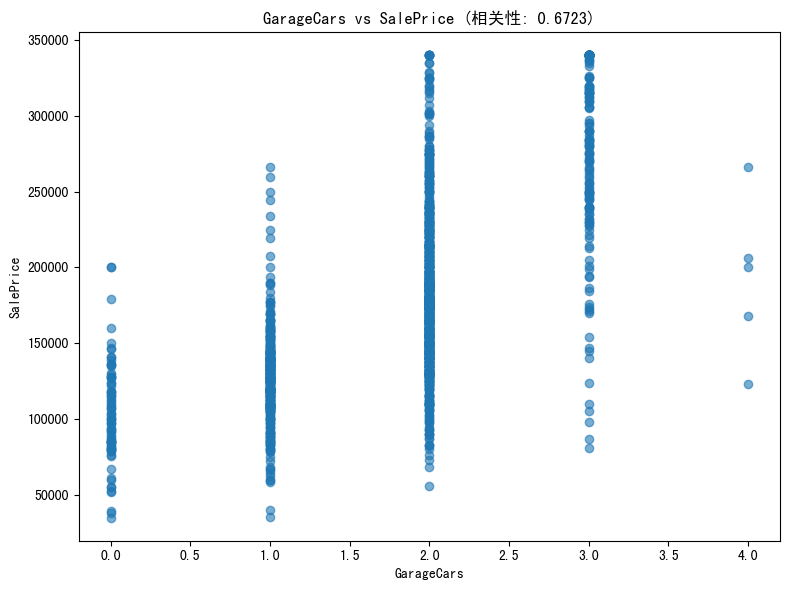

In [28]:
# 辅助函数：获取特征描述（需要先定义函数再调用）
def get_feature_description(feature_name):
    descriptions = {
        'OverallQual': '房屋整体材料和装修质量评分（1-10分）',
        'GrLivArea': '地上居住面积（平方英尺）',
        'GarageCars': '车库容量（可停放车辆数）',
        'GarageArea': '车库面积（平方英尺）',
        'TotalBsmtSF': '地下室总面积（平方英尺）',
        '1stFlrSF': '一楼面积（平方英尺）',
        'FullBath': '地上全卫生间数量',
        'TotRmsAbvGrd': '地上总房间数',
        'YearBuilt': '建造年份',
        'YearRemodAdd': '改建年份',
        'MasVnrArea': '砖石饰面面积',
        'Fireplaces': '壁炉数量'
    }
    return descriptions.get(feature_name, '特征描述未找到')

# 获取与SalePrice相关性最高的三个特征
top_3_features = price_correlation[1:4]  # 排除SalePrice自身
print("与SalePrice相关性最高的三个特征:")
for feature, correlation in top_3_features.items():
    print(f"{feature}: {correlation:.4f}")

# 详细分析这三个特征
print("\n详细分析:")

for feature in top_3_features.index:
    print(f"\n特征: {feature}")
    print(f"与房价的相关性: {top_3_features[feature]:.4f}")
    print(f"特征描述: {get_feature_description(feature)}")
    
    # 可视化特征与房价的关系
    plt.figure(figsize=(8, 6))
    plt.scatter(df_discretized[feature], df_discretized['SalePrice'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice (相关性: {top_3_features[feature]:.4f})')
    plt.tight_layout()
    plt.show()


### 第九步：结果分析和总结
#### 代码块13：实验结果总结

In [29]:
# 实验总结
print("=== 数据预处理实验总结 ===")
print(f"原始数据形状: {df.shape}")
print(f"处理后数据形状: {df_discretized.shape}")
print(f"处理的缺失值列数: {len(missing_df)}")
print(f"标准化后的价格分布: 均值≈0, 标准差≈1")

print("\n=== 关键发现 ===")
print("1. 与房价相关性最高的三个特征:")
for i, (feature, corr) in enumerate(top_3_features.items(), 1):
    print(f"   {i}. {feature}: {corr:.4f}")

print("\n2. 业务解释:")
print("   - OverallQual: 房屋质量是影响房价的最重要因素")
print("   - GrLivArea: 居住面积直接影响房屋价值")  
print("   - GarageCars/GarageArea: 车库容量反映房屋配套设施水平")

print("\n3. 数据预处理效果:")
print("   - 成功处理了所有缺失值")
print("   - 识别并处理了异常值")
print("   - 完成了数据标准化和离散化")
print("   - 为后续建模分析奠定了基础")

=== 数据预处理实验总结 ===
原始数据形状: (1460, 81)
处理后数据形状: (1460, 83)
处理的缺失值列数: 19
标准化后的价格分布: 均值≈0, 标准差≈1

=== 关键发现 ===
1. 与房价相关性最高的三个特征:
   1. OverallQual: 0.8169
   2. GrLivArea: 0.7293
   3. GarageCars: 0.6723

2. 业务解释:
   - OverallQual: 房屋质量是影响房价的最重要因素
   - GrLivArea: 居住面积直接影响房屋价值
   - GarageCars/GarageArea: 车库容量反映房屋配套设施水平

3. 数据预处理效果:
   - 成功处理了所有缺失值
   - 识别并处理了异常值
   - 完成了数据标准化和离散化
   - 为后续建模分析奠定了基础


#### 实验总结    
- 学习了jupyterlab基本操作，学习了数据处理分析相关知识，一些基本的数据处理图表类型、统计方法、不同数据类型的处理策略等等。  
- 其他收获于实验文档体现。  
#### 实验困难   
- 实验思路不明确，未接触数据分析，对实验处理的一些基本方法、图标等未了解，需要大量借助大模型学习。